# Applied economic analysis Python assignment
|Name|Examnr.|
|----|-------|
|Colm Roche|111778|
|Hemal Kanji|381409|
|Marco Alessandrini|440893|

### Research Question

In this notebook we aim to check for the relationship of population with tertiary education (those in the age group of 25-34 whom have completed higher education) and its effects on the gender wage gap (difference between median earnings of men and women relative to median earnings of men). This is, whether higher participation in tertiary education in fact promotes lower gender wage gap. Our dependent variable is, therefore, gender wage gap.


### Motivation 
From the literature we can distinguish three different definitions of gender gap: when women earn generally less than men, when men earn more than women for the same occupation or for occupations with the same requirements. Over the last decades we observed a clear pattern of convergence between female to men wages, which went with a sustained increase in the rates of participation of women in the labour force. However, this trend slowed down from the beginning of the 90's [(Blau and Khan, 2000)](http://econ2.econ.iastate.edu/classes/econ321/orazem/blau_wages.pdf) until it interrupted during the Financial and Debt Crisis, and it is unlikely to decrease during this period.  

Lot of studies have been done in order to investigate and identify the reasons that could explain this phenomenon and all of them proved the existence of part of this gap (i.e. Unexplained) that cannot be justified by any economic factor and it should represent an estimate of the direct discrimination between man and women in terms of wages [(Hegewisch and Hartmann, 2014)](http://www.iwpr.org/publications/pubs/occupational-segregation-and-the-gender-wage-gap-a-job-half-done). They estimated that one year after the graduation, women, on average, earn 7% less than man, for comparable position, and this gap increases until reaching 12% only 10 years after the graduation. Moreover, researchers managed to explore the levels of occupational integration within countries and quantify the effect of the gender segregation in the gender wage gap. Furthermore, evidence shows	 that the gender earnings ratio in inversely related to the variations occurring in the occupational segregation. Additionally, they discovered that for each major level of occupation, both man and women incur in a “wage penalty” if they work in a female-dominated field. Furthermore, from the data and analysis collected by [Noland et al. (2016)](https://piie.com/publications/wp/wp16-3.pdf) we know that firms in which higher positions are, on average, more occupied by women perform better and drive positive growth rates.

In general, we know that gender gap relies on the existence of social norms which prevent women to have the same opportunities as men do, and yield discrepancies in terms of their wages. 
For these reasons, implementing active policies to better integrate the labour market seems crucial to alleviate and reduce the size of gender pay inequality, and that is what many countries are doing in order to accomplish this challenge. In particular, we found extremely important the role that education plays in this context. Firstly, we expect that a higher share of graduated women may yield a positive dividend in terms of wage equality, by assuming a positive relationship between tertiary education and equal access to opportunities. Secondly, from [Livanos and Nunez (2012)](http://wrap.warwick.ac.uk/37583/6/WRAP_Livanos_ManuscriptFinal.pdf) we can interpret a degree as a signal of workers’ commitment, which is expected to reduce the gender gap through less discrimination against women. 

So, ensuring an equal pay and stimulate female participation into the labour force will improve integration in the labour market and will generate benefits for the whole society and economy.


### Methodology
To answer our question we opted for a simple regression analysis on this topic. We have collected our data from the OECD databank, thus we focus our efforts on this group of countries. We use the year of 2014 since it is the most recent year with the most complete set of data.
From our initial set of all 35 OECD countries we had to exclude some countries in which we did not have the full set of data variables we needed. The remainder number of countries is 28 – this would be our relevant sample.
Then we performed a regression analysis, first a naïve regression and after we controlled for other variables so that we could obtain a rather robust outcome.



In [100]:
#importing the packages that are required to run the regression analysis 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import statsmodels.formula.api as smf

#allowing us to show plots directly in the notebook
%matplotlib inline

In [102]:
#Importing the data from a CSV file
data = pd.read_csv('/Users/colmroche/Downloads/data.csv')

## Overview of the dataset

In [147]:
#To print an overview of the dataset
print data

   Country    WAGEGAP     EDUTRY       USD_CAP  FERTILITY   EDUEXP  \
0      AUS  15.385000  48.131390   46841.53969       1.80  18336.9   
1      AUT  17.729000  38.403149   48645.56794       1.46  16695.0   
2      BEL   3.299000  44.239079   45044.44265       1.72  15910.7   
3      CHE  16.941000  45.997864   61282.09353       1.54  25125.5   
4      CZE  16.254999  29.887350   32387.98038       1.53  10432.0   
5      DEU  17.080000  28.422802   47099.45752       1.47  16894.5   
6      DNK   6.324000  42.130608   47851.86852       1.69  16460.5   
7      EST  28.339001  40.421608   28541.26534       1.54  11607.2   
8      FIN  19.608999  40.308151   41518.70532       1.71  17868.4   
9      GBR  17.382999  49.185982   40755.39260       1.81  25743.8   
10     HUN   3.773000  32.109055   25516.84705       1.41   9979.8   
11     IRL  15.173000  50.768299   51337.49365       1.95  13380.5   
12     ISL  13.593000  40.588055   44330.78481       1.93  11255.5   
13     ITA   5.55600

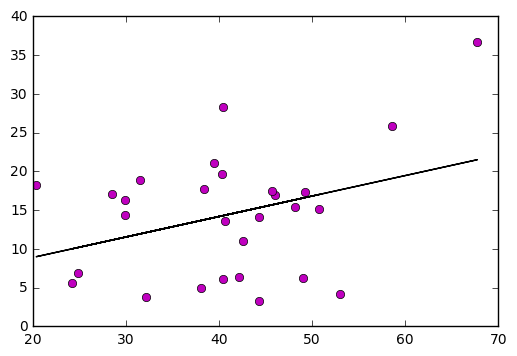

In [141]:
#Plotting the data for each covariate
#Setting the x variable
x = data.EDUTRY
#Setting the y variable
y = data.WAGEGAP
#Creating a function that produces an output of the expected y for a given x in order to plot the correlation coefficient 
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
#Finally producing the graph with the line of best fit.
plt.figure()
plt.plot(x,y, 'mo', x, fit_fn(x), '-k')

plt.show()
#same procedure in the graphs below with different colours and x variables. 

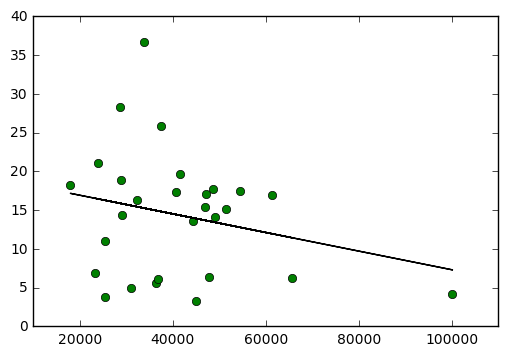

In [140]:
x = data.USD_CAP
y = data.WAGEGAP
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 

plt.figure()
plt.plot(x,y,'go', x, fit_fn(x), '-k')

plt.show()

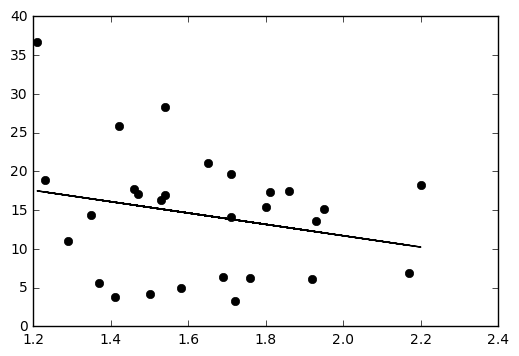

In [142]:
x = data.FERTILITY
y = data.WAGEGAP
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 

plt.figure()
plt.plot(x,y, 'ko', x, fit_fn(x), '-k')

plt.show()

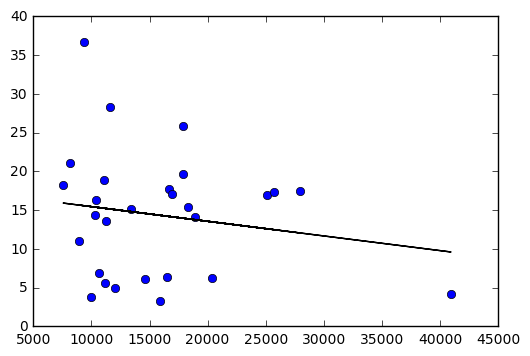

In [143]:
x = data.EDUEXP
y = data.WAGEGAP
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 

plt.figure()
plt.plot(x,y, 'o', x, fit_fn(x), '-k')

plt.show()

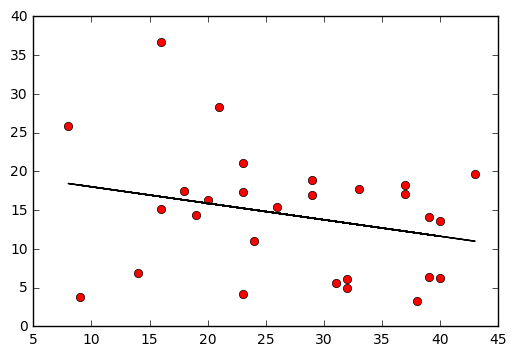

In [144]:
x = data.WOMENPOLVOICE
y = data.WAGEGAP
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 

plt.figure()
plt.plot(x,y, 'ro', x, fit_fn(x), '-k')

plt.show()

## Simple linear Regression


y = $\alpha$ + $\beta_{1}$EDUTRY + $\mathrm{e}$

In [127]:
#Using the ols function in statsmodels to produce a naive ols regression.
lm = smf.ols(formula='WAGEGAP ~ EDUTRY', data=data).fit()
#printing the summary of the regression. 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                WAGEGAP   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.629
Date:                Sun, 29 Jan 2017   Prob (F-statistic):             0.0679
Time:                        18:15:42   Log-Likelihood:                -95.820
No. Observations:                  28   AIC:                             195.6
Df Residuals:                      26   BIC:                             198.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.6376      5.823      0.625      0.5



We have that in this naïve regression an increase of 1% in the proportion of people with tertiary education from 25-34 years old results in an increase of 0,2639 on the gender wage gap. This in fact goes against our expectations since from our research design we would expect it to lower. However, this result, at a 5% significance level is not statistically significant.

## Multiple variable linear regression

By simply regressing the gender wage gap to the percentage of population aged 25-34 years old with tertiary education we would end up not controlling for unobservable variables which can result in a biased outcome. 

The country’s income can be a valid proxy for domestic productivity levels. According to [Redding, EJ 1996](https://www.princeton.edu/~reddings/pubpapers/lowskillEJ1996.pdf) investment in R&D results in higher total factor productivity. Also as Redding states, increases in TFP would result in higher schooling enrolment rates. For this reason we control for GDP per Capita (**USDCAP**) as a way to control for the relevant sample’s productivity levels.

As [Livanos and Nunez]( http://wrap.warwick.ac.uk/37583/6/WRAP_Livanos_ManuscriptFinal.pdf) state on their paper on the effect of higher education on gender-wage gap (2012) what may cause this gap to persist is the fact that employers seem to avoid hiring workers that may be driven off by personal goals to the detriment of the company’s objectives. For this reason we decided to control for women’s fertility (**FERTILITY**) – number of children per woman. A high fertility rate can be perceived by the employer as a lack of incentive for the employee to commit to their work.

Even though there are some similarities among the countries that constitute our relevant sample it is also true that different efforts toward education have been taken by the different countries. For this reason we found appropriate to control for public spending in tertiary education in USD per student (**EDUEXP**).

Lastly, it is important to look at the role of women in the different countries of our sample. Women’s role in the society is intrinsically connected to the cultural aspect of the different countries. For this reason we control for the variable Women Political Voice (**WOMENPOLVOICE**) which aims to evaluate the rate of political participation of women in their countries.

y$_{i}$ = $\alpha$ + $\beta_{1}EDUTRY_{i}$ + $\beta_{2}$USDCAP$_{i}$ + $\beta_{3}FERTILITY_{i}$ +$\beta_{4}EDUEXP_{i}$ + $\beta_{4}WOMENPOLVOICE_{i}$ + $\mathrm{e}_{i}$

By adding covariates:
For this reason in the naïve regression we can expect selection bias. Through our research design and further readings we did select a set of variables that we can control for in order to produce a more robust result that can answer our research question.


In [99]:
#Here we add a number of covatiates that we want to control for to eliminate selection bias. 
lm = smf.ols(formula='WAGEGAP ~ EDUTRY+USDCAP+FERTILITY+EDUEXP+WOMENPOLVOICE', data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                WAGEGAP   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     2.565
Date:                Sun, 29 Jan 2017   Prob (F-statistic):             0.0566
Time:                        17:32:15   Log-Likelihood:                -91.219
No. Observations:                  28   AIC:                             194.4
Df Residuals:                      22   BIC:                             202.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        14.4841     11.460      1.264


The EDUTRY variable coefficient becomes statistically significant at the 5% level but the direction of this coefficient is still not the one we expected. By having more people completing tertiary education we have that the wage gap increases even more than what it did in the naïve regression. None of the other added covariates are statistically significant at the 5% level. However in this regression we do have a higher R-Squared when comparing to the single regression. However we ought to be aware of the validity of the R-Squared for statistical significance.